In [119]:
# importing packages 

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import plotly as py
import plotly.graph_objs as go
import seaborn as sns
import scikitplot as skplt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits.mplot3d import Axes3D

import sys
import warnings
warnings.filterwarnings("ignore")

import helper_functions


In [120]:
#read csv file and view dataset
data = pd.read_csv("Mall_Customers.csv")
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
#view number of rows and columns in dataset
data.shape

(200, 5)

In [18]:
#check datatypes of columns
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [224]:
#Perform exploratory data analysis on the dataset 

#view statistics numbers of variables
data.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


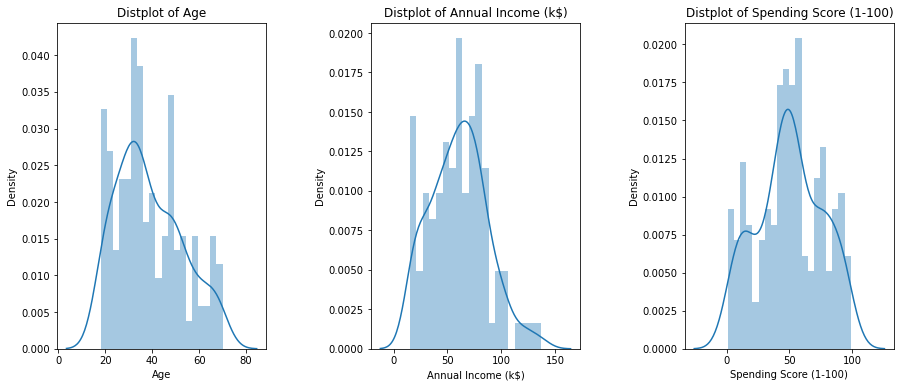

In [20]:
#plot distribution of Age, Annual Income and Spending score
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(data[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

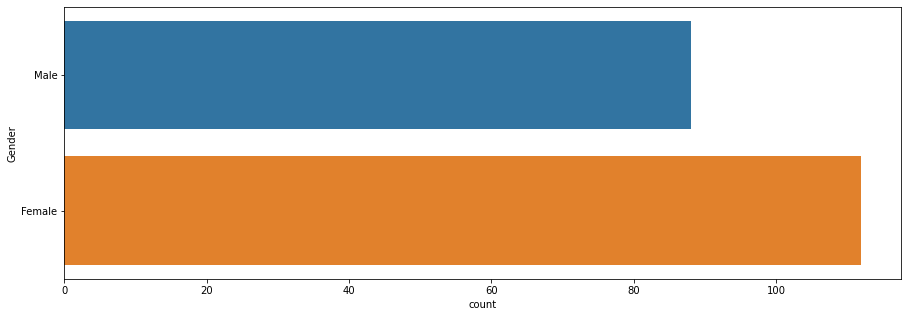

In [21]:
#plot count of gender
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = data)
plt.show()

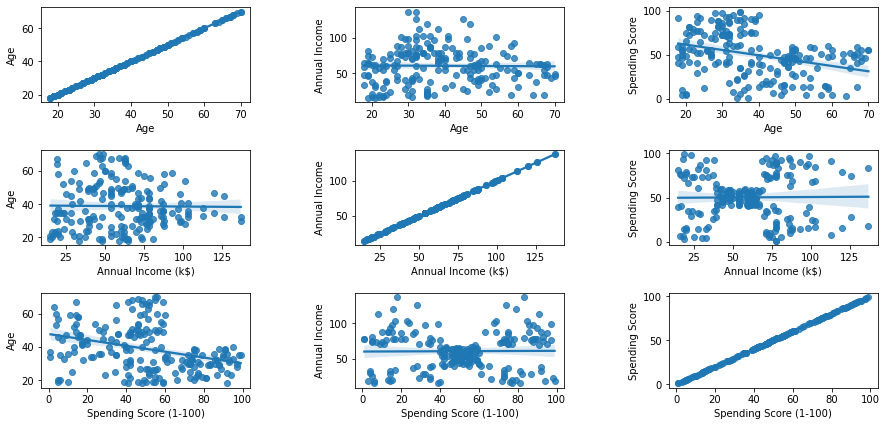

In [22]:
#correlation plot between variables
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = data)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

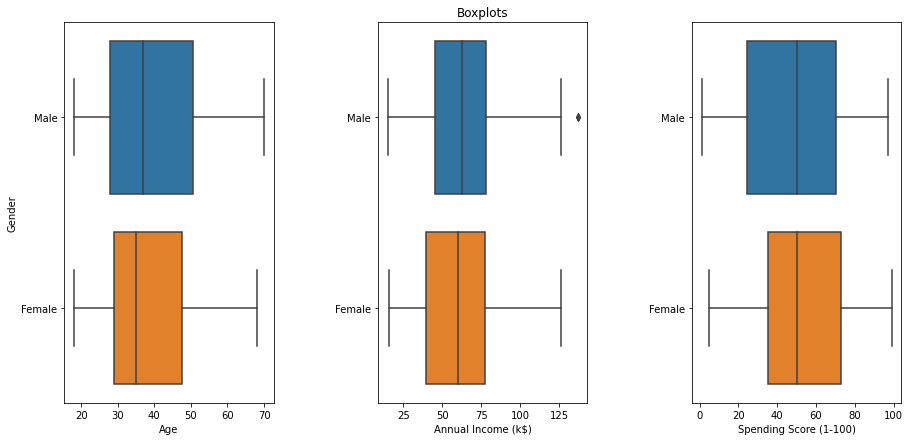

In [23]:
#Box plot of Age, Annual Income, Spending Score for each gender
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.boxplot(x=cols, y="Gender", data=data)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots' if n == 2 else '')
plt.show()

In [214]:
#using the silhouette plot to determine best number of clusters and cluster plot

class k_means_clustering(object):
    def compute(self, data, range_n_clusters, x, y):
        silhouette_avg_n_clusters = []
        avg_distance = []
        for n_clusters in range_n_clusters:
            #create elbow plot
            clusterer = KMeans(n_clusters=n_clusters, random_state=42).fit(data)
            avg_distance.append(clusterer.inertia_)

        style.use("fivethirtyeight")
        plt.plot(range_n_clusters, avg_distance)
        plt.xlabel("Number of Clusters (k)")
        plt.ylabel("Distance")
        
         
        for n_clusters in range_n_clusters:
            # Create a subplot with 1 row and 2 columns
            fig, (ax1, ax2) = plt.subplots(1, 2)
            fig.set_size_inches(18, 7)

            # The 1st subplot is the silhouette plot
            # The silhouette coefficient can range from -1, 1 but in this project all
            # lie within [-0.1, 1]
            ax1.set_xlim([-0.1, 1])
            # The (n_clusters+1)*10 is for inserting blank space between silhouette
            # plots of individual clusters, to demarcate them clearly.
            ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

            # cluster using the KMeans Algorithm
            # Initialize the clusterer with n_clusters value and a random generator
            # seed of 10 for reproducibility.
            clusterer = KMeans(n_clusters=n_clusters, random_state=42)
            cluster_labels = clusterer.fit_predict(data)


            # use silhouette plot to determine the best number of clusters
            # The silhouette_score gives the average value for all the samples.
            # This gives a perspective into the density and separation of the formed
            # clusters
            silhouette_avg = silhouette_score(data, cluster_labels)
            print("For n_clusters =", n_clusters,
                  ", The average silhouette_score is :", silhouette_avg)
            #print(silhouette_avg)
            silhouette_avg_n_clusters.append(silhouette_avg)
            #print(silhouette_avg_n_clusters)
            # Compute the silhouette scores for each sample
            sample_silhouette_values = silhouette_samples(data, cluster_labels)
        
            y_lower = 10
            for i in range(n_clusters):
                # Aggregate the silhouette scores for samples belonging to
                # cluster i, and sort them
                ith_cluster_silhouette_values = \
                    sample_silhouette_values[cluster_labels == i]

                ith_cluster_silhouette_values.sort()

                size_cluster_i = ith_cluster_silhouette_values.shape[0]
                y_upper = y_lower + size_cluster_i

                color = matplotlib.cm.nipy_spectral(float(i) / n_clusters)
                ax1.fill_betweenx(np.arange(y_lower, y_upper),
                                  0, ith_cluster_silhouette_values,
                                  facecolor=color, edgecolor=color, alpha=0.7)

                # Label the silhouette plots with their cluster numbers at the middle
                ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

                # Compute the new y_lower for next plot
                y_lower = y_upper + 10  # 10 for the 0 samples

            ax1.set_title("The silhouette plot for the various clusters.", fontsize=15)
            ax1.set_xlabel("The silhouette coefficient values", fontsize=12)
            ax1.set_ylabel("Cluster label", fontsize=12)

            # The vertical line for average silhouette score of all the values
            ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

            ax1.set_yticks([])  # Clear the yaxis labels / ticks
            ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

            # 2nd Plot showing the actual clusters formed
            colors = matplotlib.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
            ax2.scatter(data[:, 0], data[:, 1], marker='o', s=50,
                        c=colors, edgecolor='k')

            # Labeling the clusters
            centers = clusterer.cluster_centers_
            # Draw white circles at cluster centers
            ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                        c="orange", s=300, edgecolor='k')

            for i, c in enumerate(centers):
                ax2.scatter(c[0], c[1], marker='$%d$' % i,
                            s=50, edgecolor='k')

            ax2.set_title("The visualization of the clustered data.", fontsize=15)
            ax2.set_xlabel(x, fontsize=12)
            ax2.set_ylabel(y, fontsize=12)

            plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                          "with n_clusters = %d" % n_clusters),
                         fontsize=18, fontweight='bold')
            
        return silhouette_avg_n_clusters
       


For n_clusters = 2 , The average silhouette_score is : 0.4692341232501655
For n_clusters = 3 , The average silhouette_score is : 0.45300127016521263
For n_clusters = 4 , The average silhouette_score is : 0.49973941540141753
For n_clusters = 5 , The average silhouette_score is : 0.43350225495428363
[2, 3, 4, 5]
[0.4692341232501655, 0.45300127016521263, 0.49973941540141753, 0.43350225495428363]


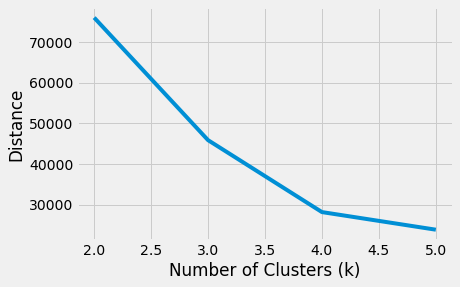

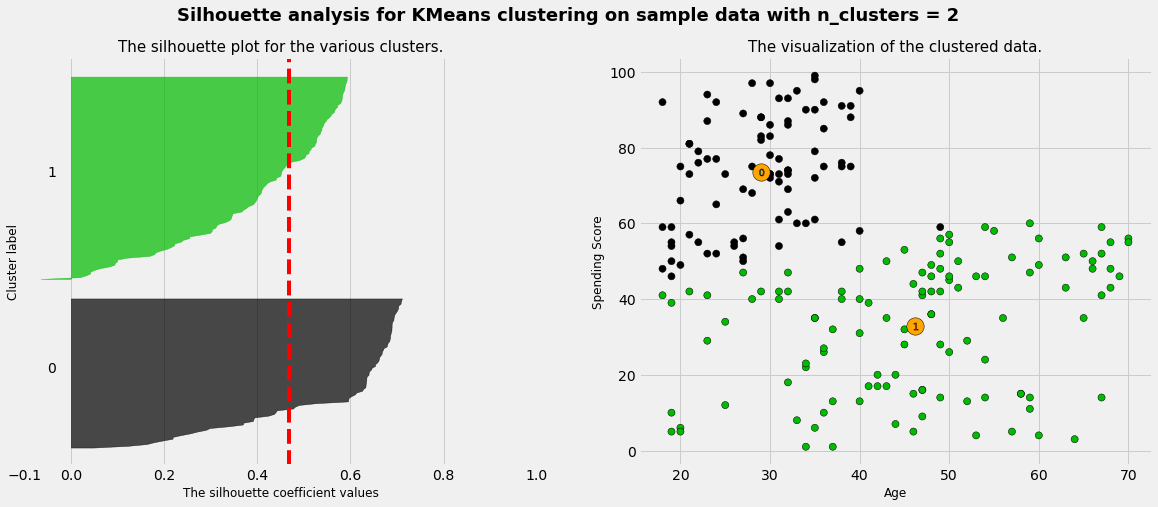

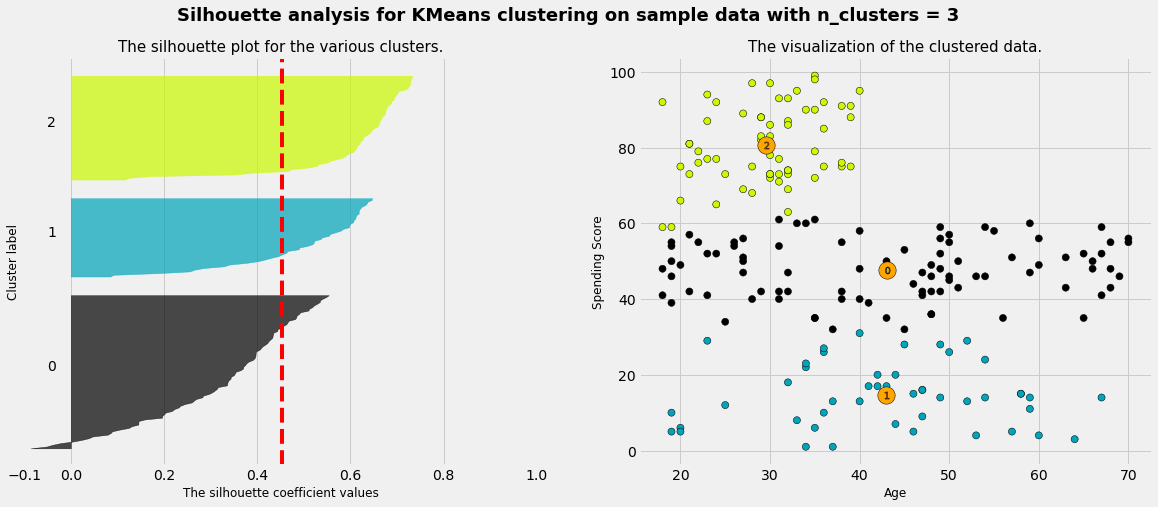

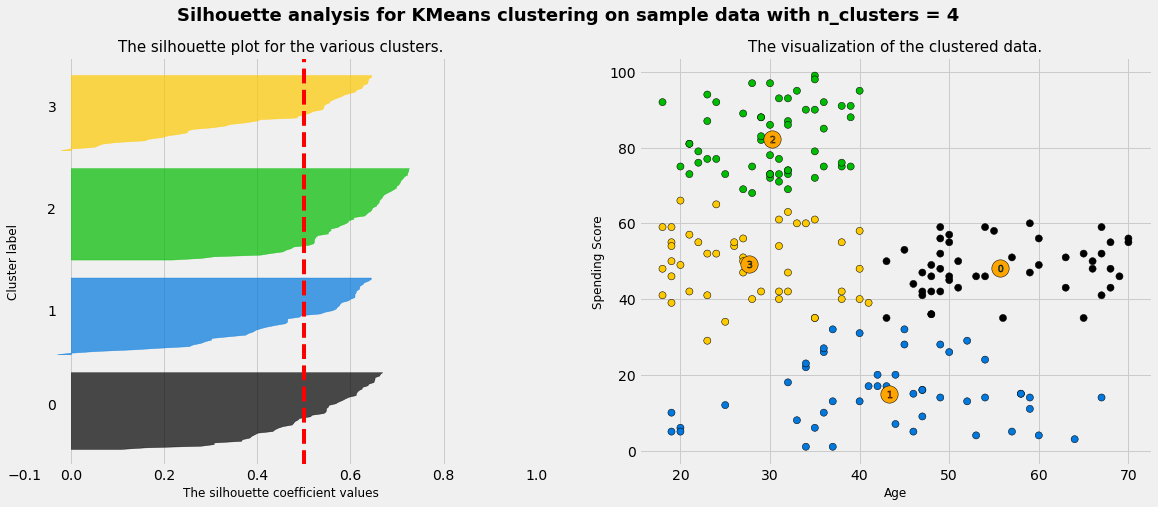

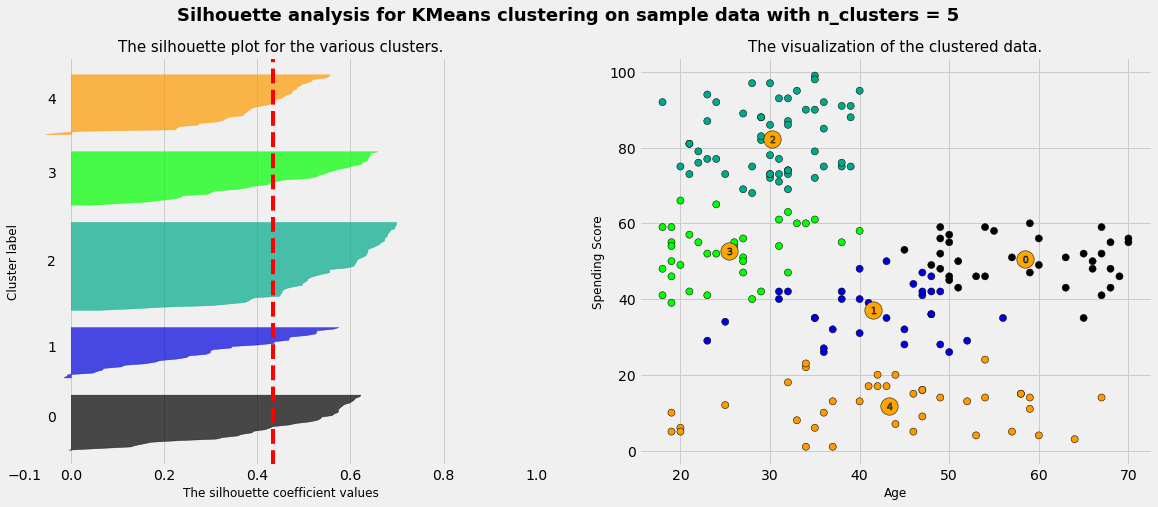

In [215]:
# Segmentation using Age and Spending Score

#create an instance of the class
plot_graphs = k_means_clustering() 

# Extract columns
X1 = data[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
range_n_clusters = [2,3,4,5]

#determine best number of clusters and cluster plot for Age and spending score
silhouette_avg_n_clusters = plot_graphs.compute(X1,range_n_clusters , "Age", "Spending Score")

print(range_n_clusters)
print(silhouette_avg_n_clusters)


In [205]:
#plot silhouette score vs no of clusters for Age and Income
style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()


For n_clusters = 2 , The average silhouette_score is : 0.42620850066216065
For n_clusters = 3 , The average silhouette_score is : 0.4254725038202792
For n_clusters = 4 , The average silhouette_score is : 0.43295184273333076
For n_clusters = 5 , The average silhouette_score is : 0.4016436644787277
[2, 3, 4, 5]
[0.42620850066216065, 0.4254725038202792, 0.43295184273333076, 0.4016436644787277]


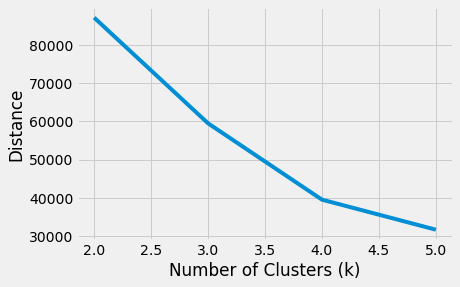

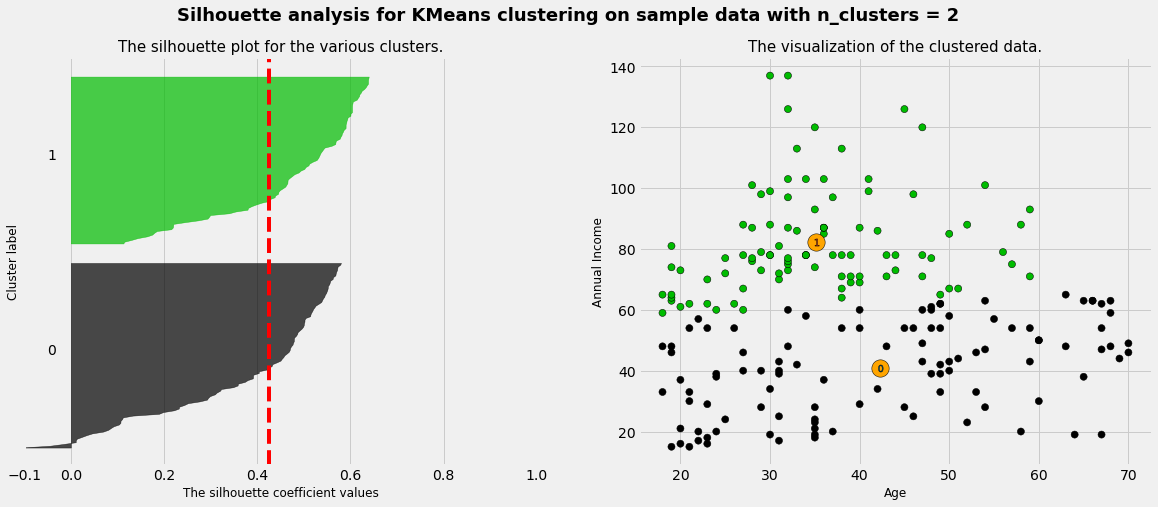

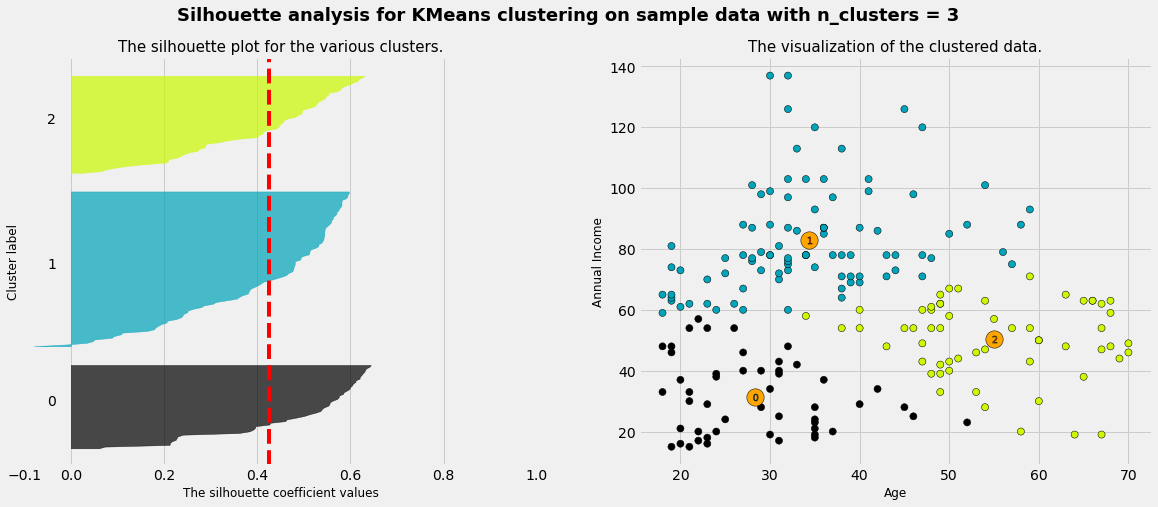

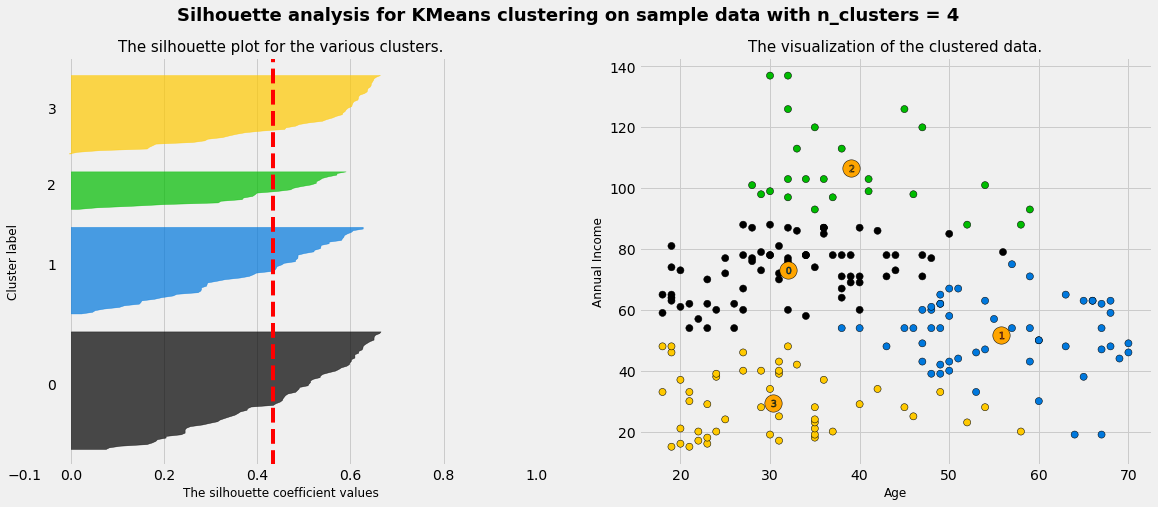

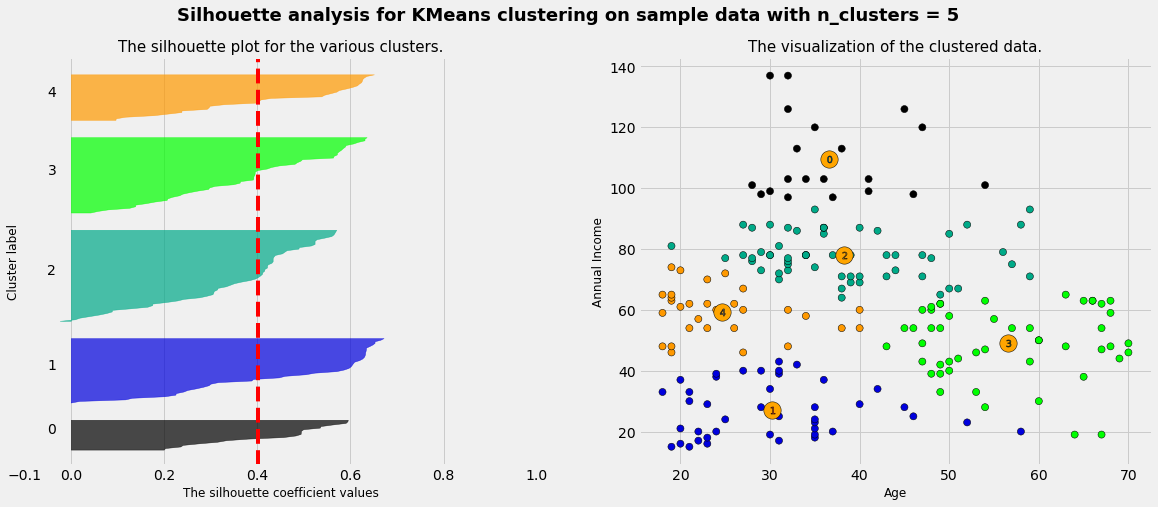

In [219]:
# Segmentation using Age and Income
# extract columns
X2 = data[['Age' , 'Annual Income (k$)']].iloc[: , :].values
range_n_clusters = [2,3,4,5]

#determine best number of clusters and cluster plot for Age and spending score
silhouette_avg_n_clusters = plot_graphs.compute(X2,range_n_clusters , "Age", "Annual Income")

print(range_n_clusters)
print(silhouette_avg_n_clusters)


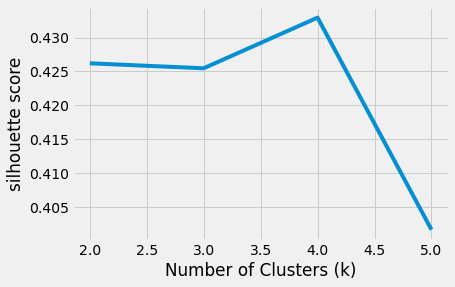

In [220]:
#plot silhouette score vs no of clusters for Age and Income
style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

For n_clusters = 2 , The average silhouette_score is : 0.2968969162503008
For n_clusters = 3 , The average silhouette_score is : 0.46761358158775435
For n_clusters = 4 , The average silhouette_score is : 0.4931963109249047
For n_clusters = 5 , The average silhouette_score is : 0.553931997444648
[2, 3, 4, 5]
[0.2968969162503008, 0.46761358158775435, 0.4931963109249047, 0.553931997444648]


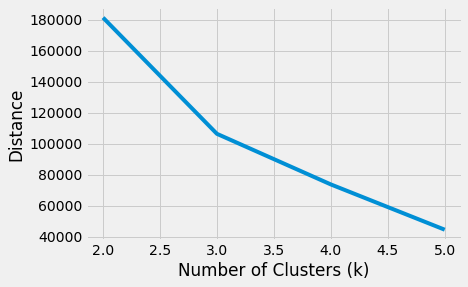

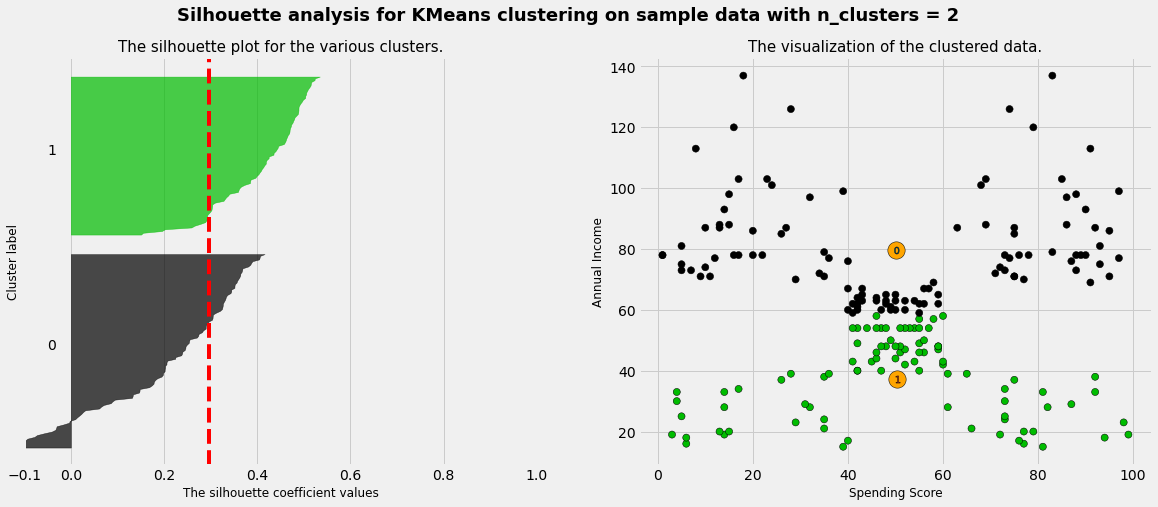

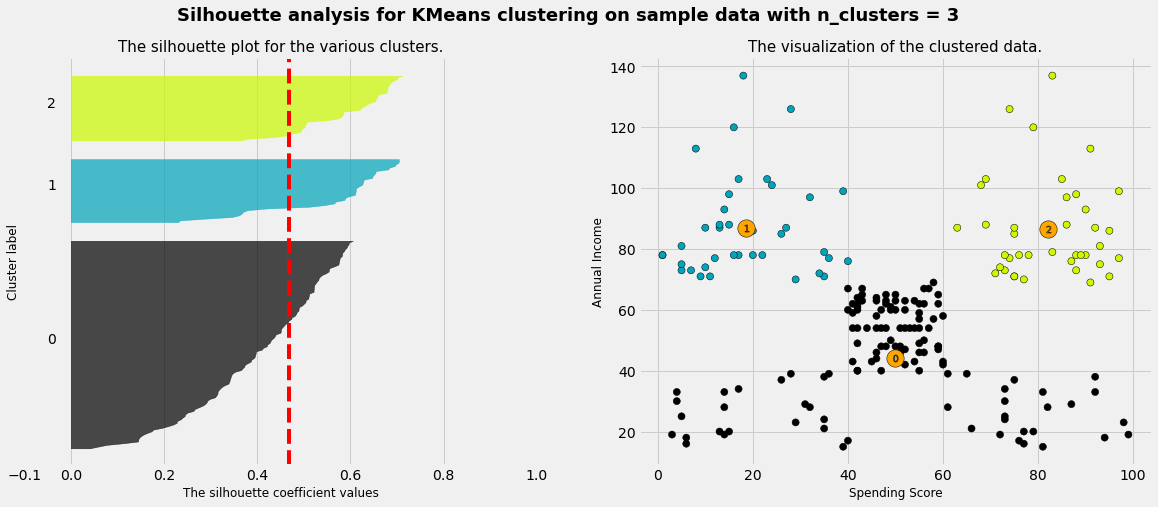

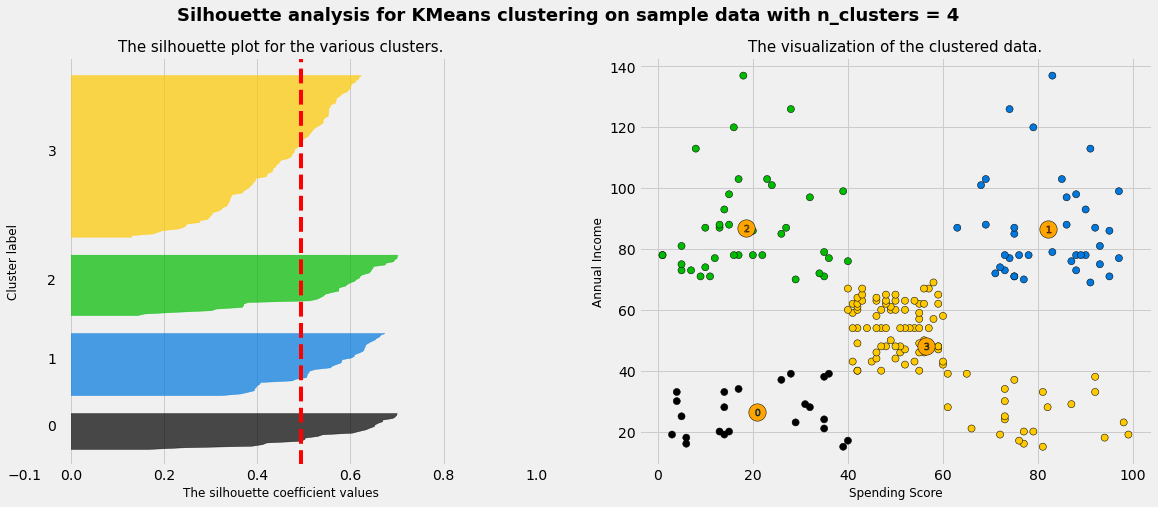

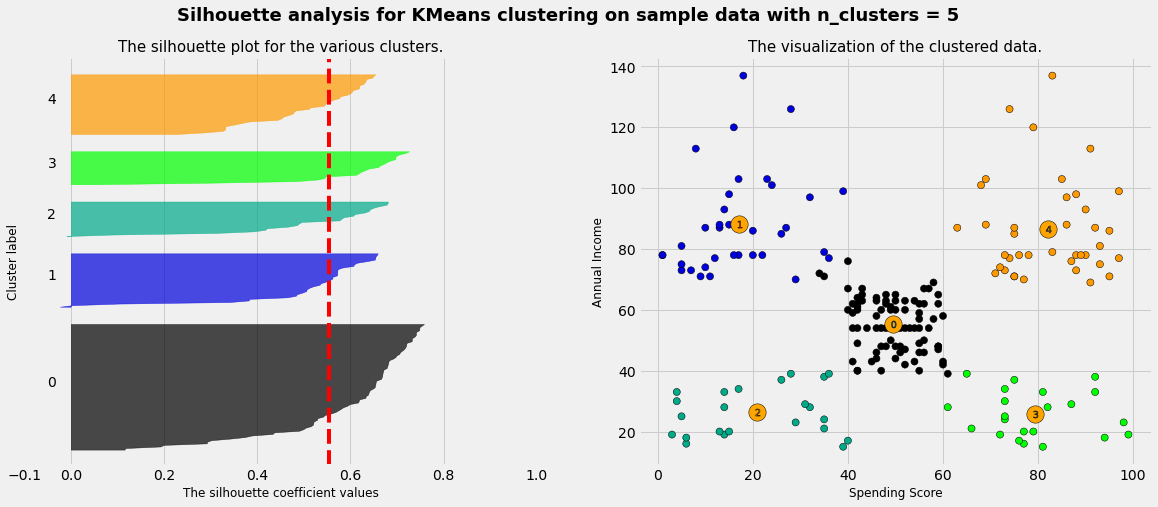

In [222]:
# Segmentation using Spending Score and Income
# extract columns
X4 = data[['Spending Score (1-100)' , 'Annual Income (k$)']].iloc[: , :].values
range_n_clusters = [2,3,4,5]

#determine best number of clusters and cluster plot for Age and spending score
silhouette_avg_n_clusters = plot_graphs.compute(X4,range_n_clusters , "Spending Score", "Annual Income")

print(range_n_clusters)
print(silhouette_avg_n_clusters)



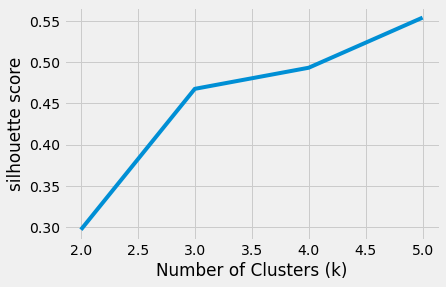

In [223]:
#plot silhouette score vs no of clusters for Age and Income
style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

In [115]:
#Cluster data based on age, income and spending score

X3 = data.loc[:,['Age','Annual Income (k$)','Spending Score (1-100)']].values
#X3

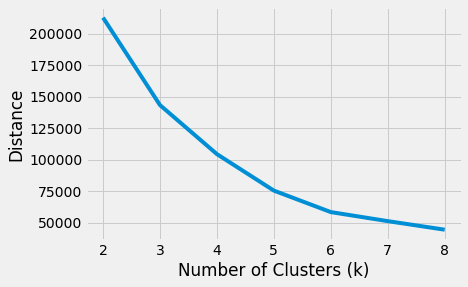

In [127]:
#use elbow plot to determine the best number of clusters for Age and Income
#Pick the value of k, where the average distance falls suddenly.
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
avg_distance=[]
for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters, random_state=42).fit(X3)
  avg_distance.append(clusterer.inertia_)

style.use("fivethirtyeight")
plt.plot(range_n_clusters, avg_distance)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distance")
plt.show()

For n_clusters = 2 , The average silhouette_score is : 0.293166070535953
For n_clusters = 3 , The average silhouette_score is : 0.3839349967742105
For n_clusters = 4 , The average silhouette_score is : 0.40546302077733304
For n_clusters = 5 , The average silhouette_score is : 0.44446409171786105
For n_clusters = 6 , The average silhouette_score is : 0.4523566166018854
For n_clusters = 7 , The average silhouette_score is : 0.4398198217929885
For n_clusters = 8 , The average silhouette_score is : 0.42977587111050725


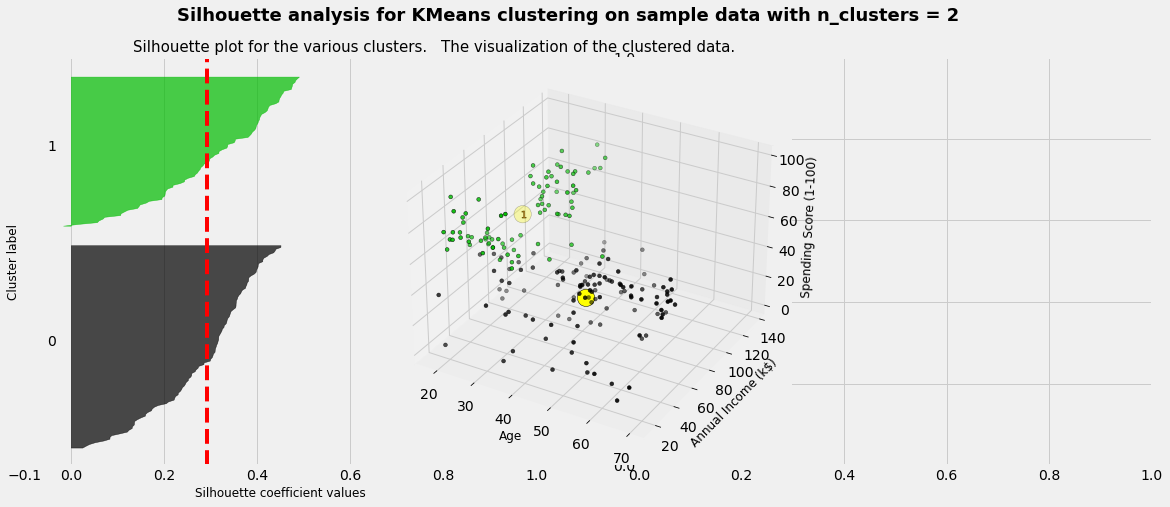

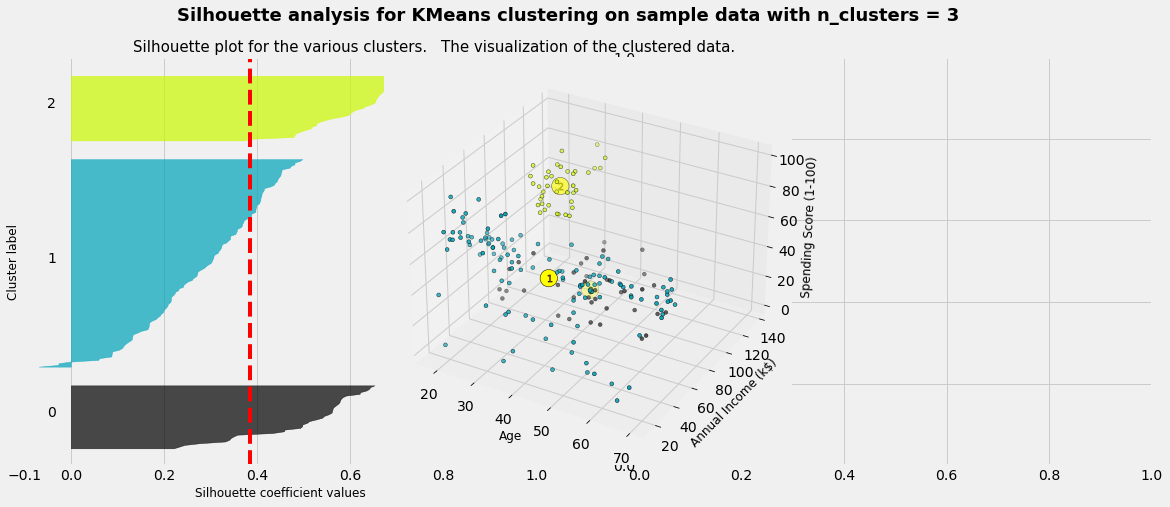

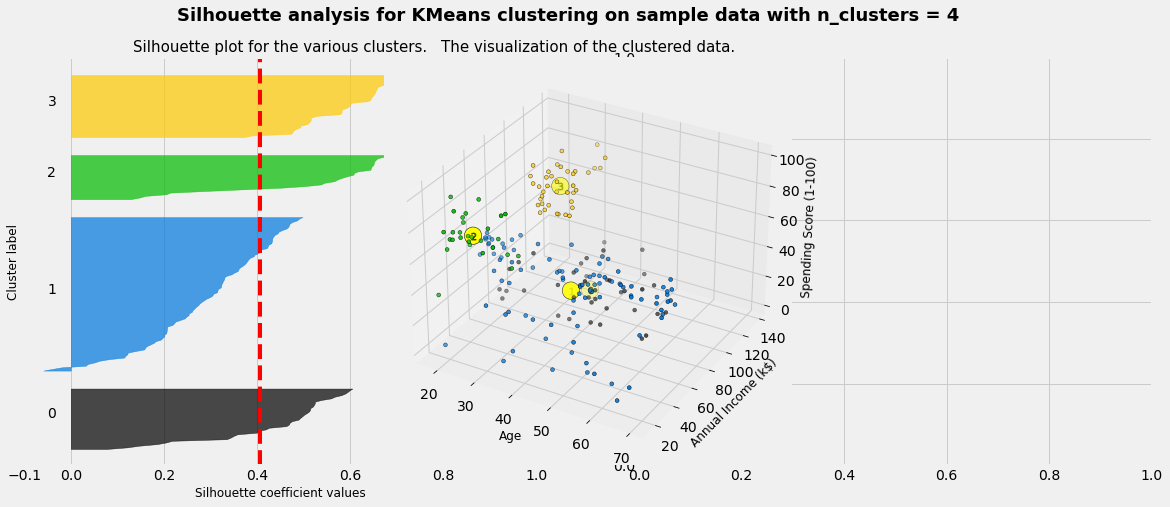

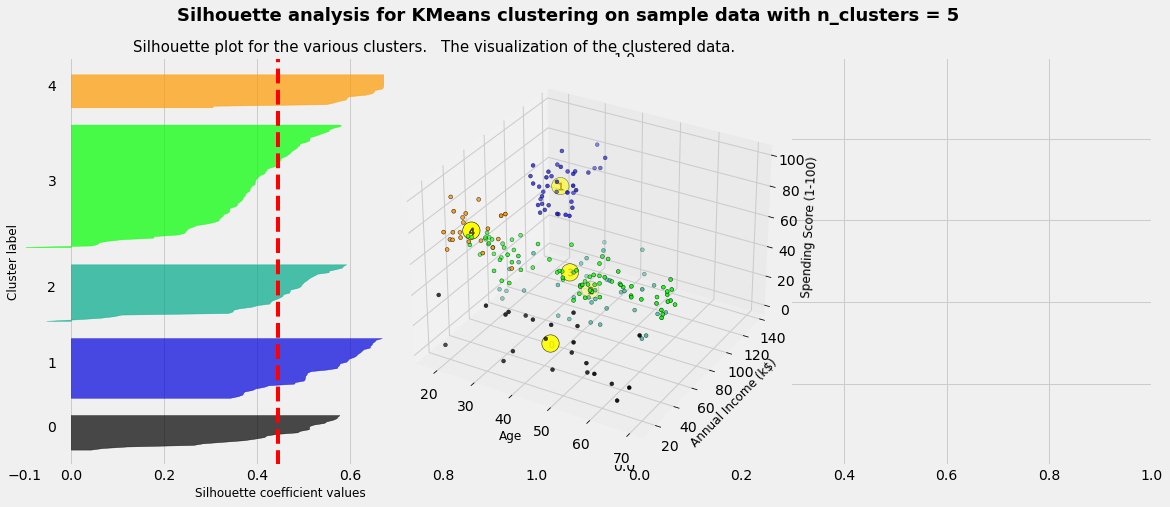

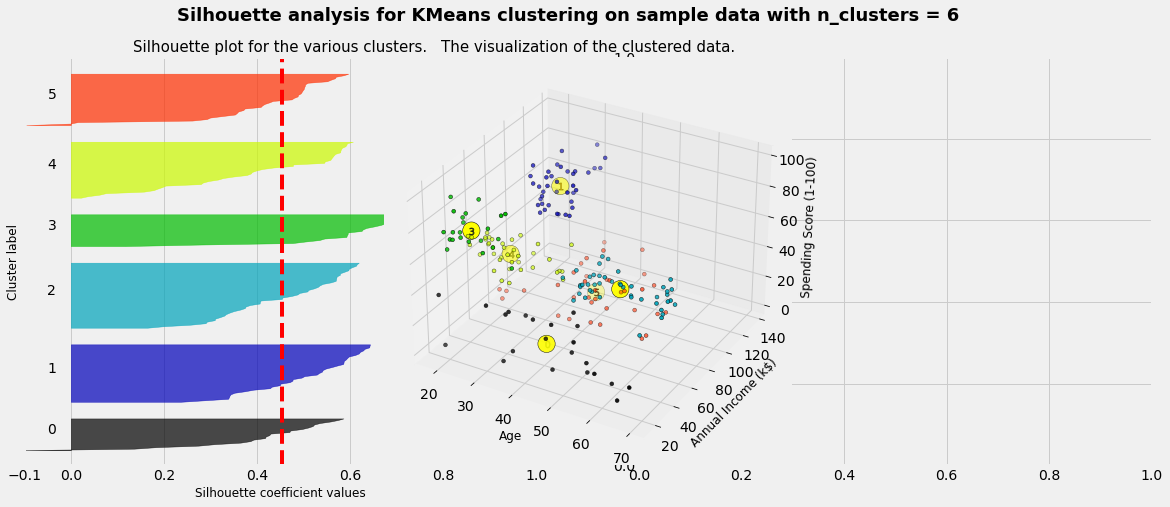

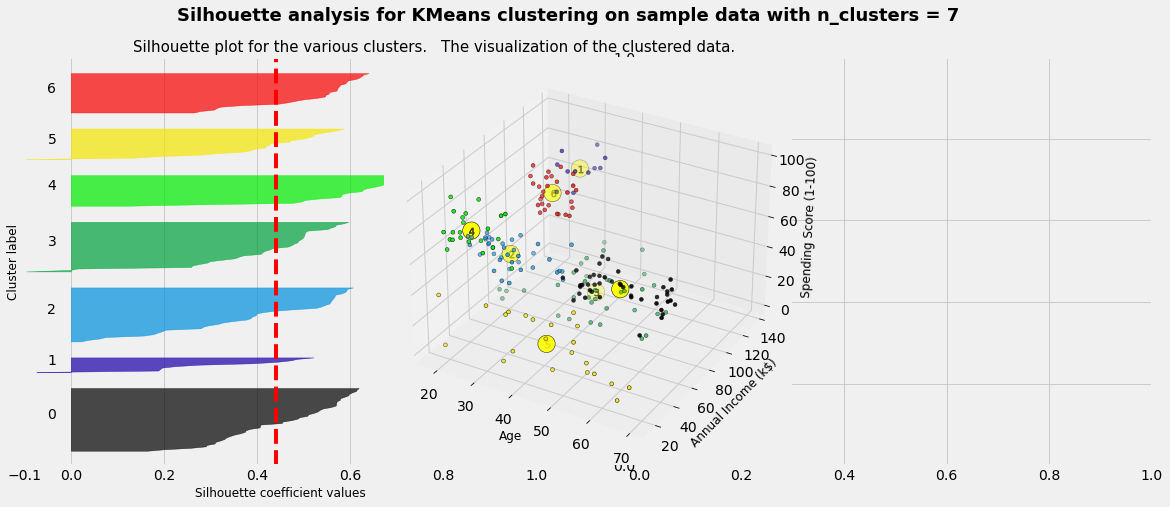

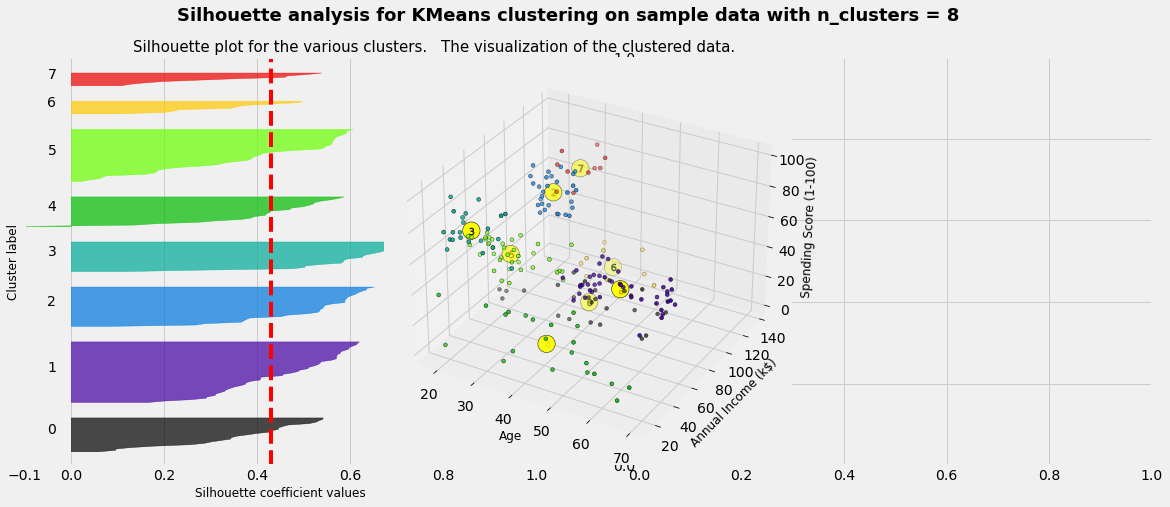

In [145]:
#using the silhouette plot to determine best number of clusters and cluster plot for Age and Income

silhouette_avg_n_clusters = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1.0])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X3) + (n_clusters + 1) * 10])

    # cluster using the KMeans Algorithm
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X3)
    
    
    # use silhouette plot to determine the best number of clusters
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X3, cluster_labels)
    print("For n_clusters =", n_clusters,
          ", The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X3, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = matplotlib.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot for the various clusters.", fontsize=15)
    ax1.set_xlabel("Silhouette coefficient values", fontsize=12)
    ax1.set_ylabel("Cluster label", fontsize=12)

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = matplotlib.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2 = fig.add_subplot(111, projection='3d')
    ax2.scatter(X3[:, 0], X3[:, 1], X3[:, 2], marker='o', s=15,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],centers[:, 2], marker='o',
                c="yellow", s=300, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1],c[2], marker='$%d$' % i,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.", fontsize=15)
    ax2.set_xlabel("Age", fontsize=12)
    ax2.set_ylabel("Annual Income (k$)", fontsize=12)
    ax2.set_zlabel("Spending Score (1-100)", fontsize=12)

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=18, fontweight='bold')

plt.show()